<a href="https://colab.research.google.com/github/smbrmoyo/Porsche_ICC/blob/main/Porsche_Icc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn

data = pd.read_csv("drive/MyDrive/icc.csv",delimiter=';')
data.sample(3)

,row ID,conf_id,porschecode,recommendation_id,c_nr,gg_id,btyp,mj_4,mj_1,usage_count,last_access,config_sendtodeal,sendtodeal_timestamp,config_shared,shared_timestamp,config_print,printed_timestamp,config_saved,saved_timestamp,region,creationtime,quality,icc_dcc,created_from_pre_config,l_aend,loaddate
78458,Row78458,32421245,PMZHP4U1,NaN,C02,46,992120,2021,M,0,2020-06-02T13:29:49.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,NaN,2020-06-02T13:29:49.0,0.0,I,0,2020-06-21T11:38:23.153,2020-06-21T11:38:23.153
132288,Row132288,33158330,PLSZIL20,NaN,C00,11,9YAAA1,2020,L,0,2020-06-18T20:42:03.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,NaN,2020-06-18T20:42:03.0,0.0,I,0,2020-06-21T11:44:30.370,2020-06-21T11:44:30.370
199613,Row199613,34390639,PLMMUE12,NaN,C33,261,9YAAA1,2020,L,0,2020-07-12T04:34:25.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,0,1900-01-01T00:00:00.0,NaN,2020-07-12T04:34:25.0,0.0,D,0,2020-07-13T18:25:36.237,2020-07-13T18:25:36.237


In [ ]:
data = data.drop(data[data['config_sendtodeal']==0].index[:236660])

In [ ]:
data['config_sendtodeal'].value_counts()

1    3869
0    3869
Name: config_sendtodeal, dtype: int64

In [ ]:
data.dtypes

row ID                      object
conf_id                      int64
porschecode                 object
recommendation_id          float64
c_nr                        object
gg_id                        int64
btyp                        object
mj_4                         int64
mj_1                        object
usage_count                  int64
last_access                 object
config_sendtodeal            int64
sendtodeal_timestamp        object
config_shared                int64
shared_timestamp            object
config_print                 int64
printed_timestamp           object
config_saved                 int64
saved_timestamp             object
region                     float64
creationtime                object
quality                    float64
icc_dcc                     object
created_from_pre_config      int64
l_aend                      object
loaddate                    object
dtype: object

In [ ]:
# Data to drop: 

In [ ]:
data['icc_dcc'].unique()

array(['D', 'I', 'E'], dtype=object)

In [ ]:
data.drop(['row ID', 'conf_id', 	'porschecode',
           'recommendation_id','c_nr','mj_4','last_access',
           'sendtodeal_timestamp','shared_timestamp',
           'printed_timestamp', 'saved_timestamp','region',
           'creationtime','created_from_pre_config', 
           'l_aend',	'loaddate'],axis='columns',inplace=True)
data

,gg_id,btyp,mj_1,usage_count,config_sendtodeal,config_shared,config_print,config_saved,quality,icc_dcc
244,261,9YAAA1,L,0,1,0,0,0,0.0,I
255,261,9YAAA1,L,0,1,0,0,0,0.0,I
463,261,9YAAA1,L,2,1,0,0,0,0.0,I
518,46,9YAAA1,L,1,1,0,1,0,0.0,I
587,261,992120,L,6,1,1,1,0,0.0,I
...,...,...,...,...,...,...,...,...,...,...
244393,261,9YAAA1,M,0,0,0,0,0,0.0,D
244394,261,9YAAA1,L,0,0,0,0,0,0.0,D
244395,11,9YAAA1,L,0,0,0,0,0,0.0,I
244396,261,9YAAA1,L,0,0,0,0,0,0.0,D


In [ ]:
data = pd.get_dummies(data=data, columns=['gg_id','btyp', 	'mj_1',
                                           'icc_dcc'])
data

,usage_count,config_sendtodeal,config_shared,config_print,config_saved,quality,gg_id_11,gg_id_46,gg_id_72,gg_id_261,btyp_992120,btyp_9YAAA1,mj_1_K,mj_1_L,mj_1_M,icc_dcc_D,icc_dcc_E,icc_dcc_I
244,0,1,0,0,0,0.0,0,0,0,1,0,1,0,1,0,0,0,1
255,0,1,0,0,0,0.0,0,0,0,1,0,1,0,1,0,0,0,1
463,2,1,0,0,0,0.0,0,0,0,1,0,1,0,1,0,0,0,1
518,1,1,0,1,0,0.0,0,1,0,0,0,1,0,1,0,0,0,1
587,6,1,1,1,0,0.0,0,0,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244393,0,0,0,0,0,0.0,0,0,0,1,0,1,0,0,1,1,0,0
244394,0,0,0,0,0,0.0,0,0,0,1,0,1,0,1,0,1,0,0
244395,0,0,0,0,0,0.0,1,0,0,0,0,1,0,1,0,0,0,1
244396,0,0,0,0,0,0.0,0,0,0,1,0,1,0,1,0,1,0,0


In [ ]:
data.sample(2)

,usage_count,config_sendtodeal,config_shared,config_print,config_saved,quality,gg_id_11,gg_id_46,gg_id_72,gg_id_261,btyp_992120,btyp_9YAAA1,mj_1_K,mj_1_L,mj_1_M,icc_dcc_D,icc_dcc_E,icc_dcc_I
92942,0,0,0,0,0,0.0,1,0,0,0,1,0,0,0,1,0,1,0
97122,0,0,0,0,0,0.0,0,0,0,1,0,1,0,1,0,1,0,0


In [ ]:
cols_to_scale = ['usage_count']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
data

,usage_count,config_sendtodeal,config_shared,config_print,config_saved,quality,gg_id_11,gg_id_46,gg_id_72,gg_id_261,btyp_992120,btyp_9YAAA1,mj_1_K,mj_1_L,mj_1_M,icc_dcc_D,icc_dcc_E,icc_dcc_I
244,0.000000,1,0,0,0,0.0,0,0,0,1,0,1,0,1,0,0,0,1
255,0.000000,1,0,0,0,0.0,0,0,0,1,0,1,0,1,0,0,0,1
463,0.004796,1,0,0,0,0.0,0,0,0,1,0,1,0,1,0,0,0,1
518,0.002398,1,0,1,0,0.0,0,1,0,0,0,1,0,1,0,0,0,1
587,0.014388,1,1,1,0,0.0,0,0,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244393,0.000000,0,0,0,0,0.0,0,0,0,1,0,1,0,0,1,1,0,0
244394,0.000000,0,0,0,0,0.0,0,0,0,1,0,1,0,1,0,1,0,0
244395,0.000000,0,0,0,0,0.0,1,0,0,0,0,1,0,1,0,0,0,1
244396,0.000000,0,0,0,0,0.0,0,0,0,1,0,1,0,1,0,1,0,0


In [ ]:
X = data.drop('config_sendtodeal',axis='columns')
y = data['config_sendtodeal']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=5)
X_train.head(5)

,usage_count,config_shared,config_print,config_saved,quality,gg_id_11,gg_id_46,gg_id_72,gg_id_261,btyp_992120,btyp_9YAAA1,mj_1_K,mj_1_L,mj_1_M,icc_dcc_D,icc_dcc_E,icc_dcc_I
242304,0.0,0,1,0,0.0,0,0,0,1,0,1,0,1,0,0,0,1
242568,0.0,0,0,0,0.0,0,0,0,1,0,1,0,1,0,1,0,0
231836,0.0,0,0,0,0.0,0,0,1,0,0,1,0,0,1,0,0,1
241503,0.0,0,0,0,0.0,0,0,0,1,0,1,0,1,0,1,0,0
241129,0.0,0,1,0,0.0,0,0,0,1,0,1,0,1,0,0,0,1


In [ ]:
data['usage_count'].unique()

In [ ]:
X_train.shape

(3482, 17)

In [ ]:
X_test.shape

(24440, 17)

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(17 , activation='relu'),
    keras.layers.Dense(34 , activation='relu'),
    keras.layers.Dense(17 , activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, clipnorm=1.0)
cce = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer=opt,
              loss='mse',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32,epochs=100)

Epoch 1/100
218/218 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4773
Epoch 2/100
218/218 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5099
Epoch 3/100
218/218 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4969
Epoch 4/100
218/218 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4913
Epoch 5/100
218/218 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4989
Epoch 6/100
218/218 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4955
Epoch 7/100
218/218 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4993
Epoch 8/100
218/218 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5010
Epoch 9/100
218/218 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.4910
Epoch 10/100
218/218 [==============================] -

In [ ]:
model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 1ms/step - loss: 0.1656 - accuracy: 0.7313


[0.16556590795516968, 0.7312661409378052]

In [ ]:
yp = model.predict(X_test)
yp[:5]

array([[0.07918972],
       [0.51159275],
       [0.11285582],
       [0.35903877],
       [0.07918972]], dtype=float32)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_test[:10]

239137    0
179009    1
238985    0
233946    0
243089    0
207062    1
243335    0
236118    0
244304    0
240096    0
Name: config_sendtodeal, dtype: int64

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
print(classification_report(y_test,y_pred))
plt.plot(confusion_matrix(y_test,y_pred))

ValueError: ignored

Text(69.0, 0.5, 'Truth')

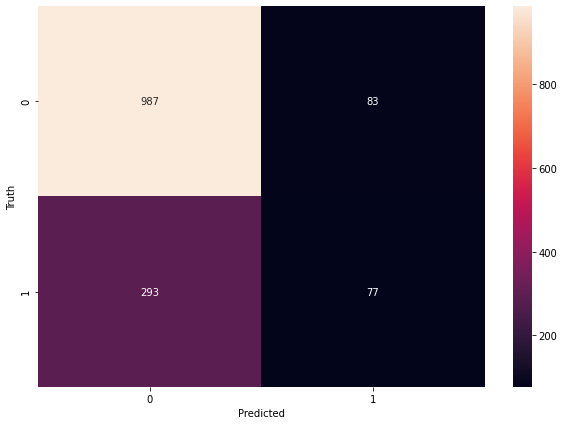

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
Weights = model.layers[-1].get_weights()[0]
Biases  = model.layers[-1].get_weights()[1]
print('\nWEIGHTS:\n')
print(Weights)
print('\nBIASES:\n')
print(Biases)
print(f'\nLength of Weights:{len(Weights)}')

In [ ]:
#Try to sort the list of weights and know what features are the most important

Weights.tolist()
Weights

In [ ]:
somme = 0
for item in Weights:
  somme+=item
somme

In [ ]:
norm_weights = [i/somme for i in Weights]:
for element in data.columns:
    print(f'{element} , {norm_weights}')

In [ ]:
# Scale all the values from 0 to 1